In [1]:
%reload_ext nb_black
%matplotlib inline
from matplotlib import style

style.use("fivethirtyeight")
import matplotlib.pyplot as plt

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

<IPython.core.display.Javascript object>

In [3]:
import datetime as dt
from pprint import pprint

<IPython.core.display.Javascript object>

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

<IPython.core.display.Javascript object>

In [5]:
# database setup
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

<IPython.core.display.Javascript object>

In [6]:
# reflect the  database into ORM class
# create automap
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

<IPython.core.display.Javascript object>

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

<IPython.core.display.Javascript object>

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

<IPython.core.display.Javascript object>

In [9]:
# Create our session (link) from Python to the DB/start a session to query the databse
session = Session(engine)

<IPython.core.display.Javascript object>

In [10]:
# Use the inspector to Explore the database and print the table names
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

<IPython.core.display.Javascript object>

In [11]:
#inspecting the Column objects for measurment class 
inspector = inspect(engine)
m_col=inspector.get_columns("measurement")
for c in m_col:
    print(c["name"], c["type"])



id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


<IPython.core.display.Javascript object>

In [12]:
#inspecting the Column objects for station class 
inspector = inspect(engine)
m_col=inspector.get_columns("station")
for c in m_col:
    print(c["name"], c["type"])



id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


<IPython.core.display.Javascript object>

In [13]:
# select and display the first 5 rows from the measurement table
engine.execute("select * from measurement limit 5").fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0)]

<IPython.core.display.Javascript object>

In [14]:
#  select and display the first 5 rows from the Station table
engine.execute("select * from station limit 5").fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6)]

<IPython.core.display.Javascript object>

# Exploratory Climate Analysis

* Design a query to retrieve the last 12 months of precipitation data and plot the results

* Calculate the date 1 year ago from the last data point in the database

* Perform a query to retrieve the data and precipitation scores

* Save the query results as a Pandas DataFrame and set the index to the date column

* Sort the dataframe by date

* Use Pandas Plotting with Matplotlib to plot the data

In [15]:
# Calculate the recent date in measurements table
recent_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(recent_date)

('2017-08-23',)


<IPython.core.display.Javascript object>

In [16]:
# Calculate the date 1 year ago from the last data point in the database
date_year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)
print(date_year_ago)

2016-08-23


<IPython.core.display.Javascript object>

In [17]:
# Perform a query to retrieve the data and precipitation scores
prec_scores = (
    session.query(Measurement.date, Measurement.prcp)
    .filter(Measurement.date >= date_year_ago)
    .order_by(Measurement.date)
    .all()
)
print(prec_scores)

[('2016-08-23', 0.0), ('2016-08-23', 0.15), ('2016-08-23', 0.05), ('2016-08-23', None), ('2016-08-23', 0.02), ('2016-08-23', 1.79), ('2016-08-23', 0.7), ('2016-08-24', 0.08), ('2016-08-24', 2.15), ('2016-08-24', 2.28), ('2016-08-24', None), ('2016-08-24', 1.22), ('2016-08-24', 2.15), ('2016-08-24', 1.45), ('2016-08-25', 0.08), ('2016-08-25', 0.08), ('2016-08-25', 0.0), ('2016-08-25', 0.0), ('2016-08-25', 0.21), ('2016-08-25', 0.06), ('2016-08-25', 0.11), ('2016-08-26', 0.0), ('2016-08-26', 0.03), ('2016-08-26', 0.02), ('2016-08-26', 0.04), ('2016-08-26', 0.0), ('2016-08-26', 0.01), ('2016-08-27', 0.0), ('2016-08-27', 0.18), ('2016-08-27', 0.02), ('2016-08-27', 0.0), ('2016-08-27', 0.12), ('2016-08-27', None), ('2016-08-28', 0.01), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.14), ('2016-08-28', 0.6), ('2016-08-28', 2.07), ('2016-08-29', 0.0), ('2016-08-29', 0.17), ('2016-08-29', 0.04), ('2016-08-29', None), ('2016-08-29', 0.0), ('2016-08-29', 0.35), ('2016-08-29', 0.9),

<IPython.core.display.Javascript object>

In [18]:
# Save the query results as a Pandas DataFrame and set the index to the date column
prec_scores_df = pd.DataFrame(prec_scores, columns=["Date", "Prcp"]).set_index("Date")
prec_scores_df.head()

,Prcp
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02


<IPython.core.display.Javascript object>

In [19]:
# Sort the dataframe by date
prec_scores_df.sort_index()
prec_scores_df

,Prcp
Date,
2016-08-23,0.00
2016-08-23,0.15
2016-08-23,0.05
2016-08-23,NaN
2016-08-23,0.02
...,...
2017-08-22,0.50
2017-08-23,0.00
2017-08-23,0.00


<IPython.core.display.Javascript object>

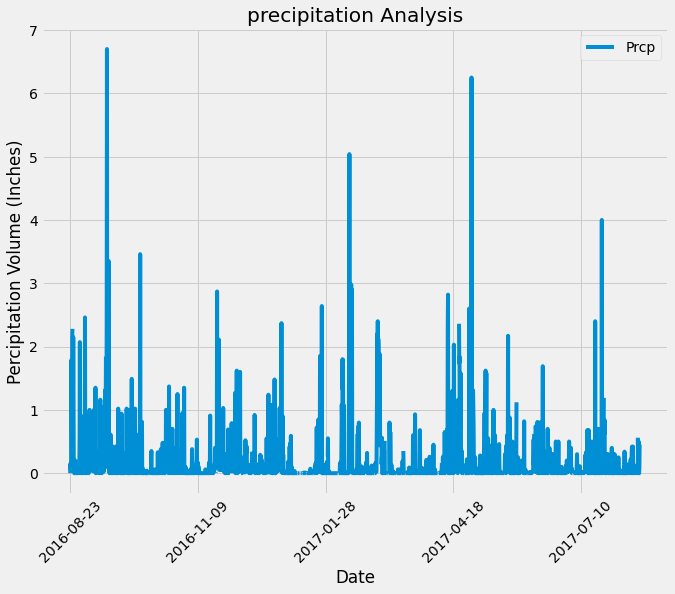

<IPython.core.display.Javascript object>

In [20]:
#Plot the results using the DataFrame plot method.
prec_scores_df.plot(figsize=(10,8),rot =45)
plt.title("precipitation Analysis")
plt.xlabel("Date")
plt.ylabel("Percipitation Volume (Inches)")
plt.grid(True)

plt.savefig("output_images/precipitation Analysis.png")
plt.show()


In [21]:
# Use Pandas to calcualte the summary statistics for the precipitation data
prec_scores_df.describe()

,Prcp
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


<IPython.core.display.Javascript object>

# Station Analysis

* Design a query to calculate the total number of stations.

* Design a query to find the most active stations.

    List the stations and observation counts in descending order.

    Which station has the highest number of observations?

    Hint: You may need to use functions such as func.min, func.max, func.avg, and func.count in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (tobs).

   Filter by the station with the highest number of observations.

   Plot the results as a histogram with bins=12.

In [22]:
# Design a query to show how many stations are available in this dataset?
# station_count = session.query(Measurement).group_by(Measurement.station).count()
station_count = session.query(func.count(Station.station)).all()
station_count

[(9)]

<IPython.core.display.Javascript object>

In [23]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = (
    session.query(Measurement.station, func.count(Measurement.station))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)
active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

<IPython.core.display.Javascript object>

In [24]:
most_active_station = active_stations[0][0]
most_active_station

'USC00519281'

<IPython.core.display.Javascript object>

In [25]:
# Using the station id from the previous query, calculate the lowest temperature recorded,
# highest temperature recorded, and average temperature most active station?
temp_obs = (
    session.query(
        func.min(Measurement.tobs),
        func.max(Measurement.tobs),
        func.avg(Measurement.tobs),
    )
    .filter(Measurement.station == most_active_station)
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.station).desc())
    .all()
)
temp_obs

[(54.0, 85.0, 71.66378066378067)]

<IPython.core.display.Javascript object>

In [26]:
# Choose the station with the highest number of temperature observations.
highest_temp = (
    session.query((Measurement.station), func.count(Measurement.tobs))
    .group_by(Measurement.station)
    .order_by(func.count(Measurement.tobs).desc())
    .all()
)
highest_temp
highest_obs = highest_temp[0][0]
highest_obs

'USC00519281'

<IPython.core.display.Javascript object>

In [27]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
last_temp_obs = (
    session.query(Measurement.tobs)
    .filter(Measurement.station == highest_obs)
    .filter(Measurement.date >= date_year_ago)
    .order_by(Measurement.date)
    .all()
)
last_temp_obs

[(77.0),
 (77.0),
 (80.0),
 (80.0),
 (75.0),
 (73.0),
 (78.0),
 (77.0),
 (78.0),
 (80.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (73.0),
 (74.0),
 (80.0),
 (79.0),
 (77.0),
 (80.0),
 (76.0),
 (79.0),
 (75.0),
 (79.0),
 (78.0),
 (79.0),
 (78.0),
 (78.0),
 (76.0),
 (74.0),
 (77.0),
 (78.0),
 (79.0),
 (79.0),
 (77.0),
 (80.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (79.0),
 (79.0),
 (79.0),
 (79.0),
 (75.0),
 (76.0),
 (73.0),
 (72.0),
 (71.0),
 (77.0),
 (79.0),
 (78.0),
 (79.0),
 (77.0),
 (79.0),
 (77.0),
 (78.0),
 (78.0),
 (78.0),
 (78.0),
 (77.0),
 (74.0),
 (75.0),
 (76.0),
 (73.0),
 (76.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (74.0),
 (75.0),
 (75.0),
 (75.0),
 (75.0),
 (71.0),
 (63.0),
 (70.0),
 (68.0),
 (67.0),
 (77.0),
 (74.0),
 (77.0),
 (76.0),
 (76.0),
 (75.0),
 (76.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (75.0),
 (74.0),
 (75.0),
 (74.0),
 (75.0),
 (73.0),
 (75.0),
 (73.0),
 (73.0),
 (74.0),
 (70.0),
 (72.0),
 (70.0),
 (67.0),
 (67.0),
 (69.0),
 (70.0),
 (68.0),
 (69.0),
 (69.0),
 

<IPython.core.display.Javascript object>

In [28]:
# Plot the results as a histogram with bins=12.
highest_tobs_df = pd.DataFrame(last_temp_obs, columns=["tobs"])
highest_tobs_df

,tobs
0,77.0
1,77.0
2,80.0
3,80.0
4,75.0
...,...
347,77.0
348,77.0
349,76.0
350,76.0


<IPython.core.display.Javascript object>

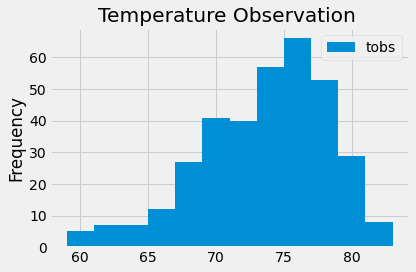

<IPython.core.display.Javascript object>

In [29]:
highest_tobs_df.plot.hist(bins=12)
plt.title("Temperature Observation ")
plt.tight_layout()
plt.savefig("output_images/TemperaturevsFrequency.png")
plt.show()

In [30]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d'
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):

    # Query database for temperatures between start and end date

    start_date = dt.datetime.strptime(start_date, "%Y-%m-%d")
    end_date = dt.datetime.strptime(end_date, "%Y-%m-%d")
    temp_obs = (
        session.query(Measurement.tobs)
        .filter(Measurement.date >= start_date)
        .filter(Measurement.date <= end_date)
        .order_by(Measurement.date)
        .all()
    )

    return (
        session.query(
            func.min(Measurement.tobs),
            func.avg(Measurement.tobs),
            func.max(Measurement.tobs),
        )
        .filter(Measurement.date >= start_date)
        .filter(Measurement.date <= end_date)
        .all()
    )


# function usage example
print(calc_temps("2012-02-28", "2012-03-05"))

[(62.0, 69.4375, 74.0)]


<IPython.core.display.Javascript object>

In [31]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax
# trip date will be on 2018-7-7 to 2018-7-22
trip_start_date = dt.date(2017, 7, 7)
trip_end_date = dt.date(2017, 7, 22)
# for your trip using the previous year's data for those same dates.
trip = calc_temps("2017-07-07", "2017-07-22")
trip

[(69.0, 78.28865979381443, 83.0)]

<IPython.core.display.Javascript object>

In [32]:
# Create a dataframe with the calculated tmin, tavg, and tmax values
trip_temp_df = pd.DataFrame(trip, columns=['Tmin', 'Tavg', 'Tmax'])
trip_temp_df 


,Tmin,Tavg,Tmax
0,69.0,78.28866,83.0


<IPython.core.display.Javascript object>

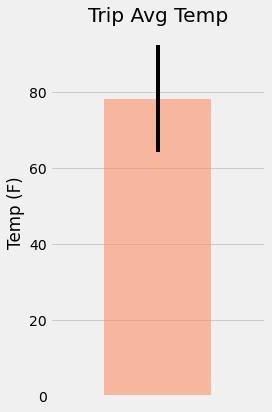

<IPython.core.display.Javascript object>

In [33]:
# Plot the results from your previous query as a bar chart.
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
trip_temp_df.plot.bar(
    y="Tavg",
    yerr=(trip_temp_df["Tmax"] - trip_temp_df["Tmin"]),
    figsize=(4, 6),
    color="coral",
    alpha=0.5,
    align="center",
    title="Trip Avg Temp",
)
plt.ylabel("Temp (F)")
plt.xticks(np.arange(0, 0.5))
plt.tight_layout()
plt.gca().legend_.remove()  # hide the legend
plt.gca().axes.get_xaxis().set_visible(False)  # hide the xaxis
plt.savefig("images/Trip Avg Temp.png")
plt.show()

In [34]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
total_rainfall = (
    session.query(
        Station.station,
        Station.name,
        Station.latitude,
        Station.longitude,
        Station.elevation,
        func.sum(Measurement.prcp),
    )
    .filter(Measurement.date >= trip_start_date)
    .filter(Measurement.date <= trip_end_date)
    .filter(Station.station == Measurement.station)
    .group_by(Measurement.station)
    .order_by(func.sum(Measurement.prcp).desc())
    .all()
)

total_rainfall

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  21.3331,
  -157.8025,
  152.4,
  10.21),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  21.45167,
  -157.84888999999998,
  32.9,
  1.8800000000000003),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  21.4234,
  -157.8015,
  14.6,
  0.9700000000000002),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  21.5213,
  -157.8374,
  7.0,
  0.88),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  21.33556,
  -157.71139,
  19.5,
  0.44),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0, 0.25),
 ('USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9, 0.0)]

<IPython.core.display.Javascript object>

## Optional Challenge Assignment

In [35]:
# Create a query that will calculate the daily normals
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)


def daily_normals(date):

    sel = [
        func.min(Measurement.tobs),
        func.avg(Measurement.tobs),
        func.max(Measurement.tobs),
    ]

    return (
        session.query(*sel)
        .filter(func.strftime("%m-%d", Measurement.date) == date)
        .all()
    )


daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

<IPython.core.display.Javascript object>

# calculate the daily normals for your trip

In [36]:
#first we need the to create a list of dates for the trip ,then format it to (%m-%d)
trip_dates = pd.date_range(trip_start_date,trip_end_date)
formated_trip_dates = trip_dates.strftime("%m-%d")
print (formated_trip_dates)

# Loop through the list of %m-%d strings and calculate the normals for each date
# push each tuple of calculations into a list called `normals`
normals_list =[]
## call daily_normals function to return the tuple list
for trip_date in formated_trip_dates:
    normals_list.append(*daily_normals(trip_date))


Index(['07-07', '07-08', '07-09', '07-10', '07-11', '07-12', '07-13', '07-14',
       '07-15', '07-16', '07-17', '07-18', '07-19', '07-20', '07-21', '07-22'],
      dtype='object')


<IPython.core.display.Javascript object>

In [37]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
trip_normals_df = pd.DataFrame(normals_list, columns=["tmin", "tmax", "tavg"])
# make the trip dates the index
trip_normals_df["date"] = trip_dates
trip_normals_df = trip_normals_df.set_index("date")

trip_normals_df

,tmin,tmax,tavg
date,,,
2017-07-07,69.0,74.910714,82.0
2017-07-08,69.0,76.083333,83.0
2017-07-09,68.0,76.192982,83.0
2017-07-10,68.0,75.620690,82.0
2017-07-11,70.0,75.789474,81.0
2017-07-12,67.0,75.964912,82.0
2017-07-13,69.0,76.189655,81.0
2017-07-14,61.0,76.228070,82.0
2017-07-15,68.0,76.254237,82.0


<IPython.core.display.Javascript object>

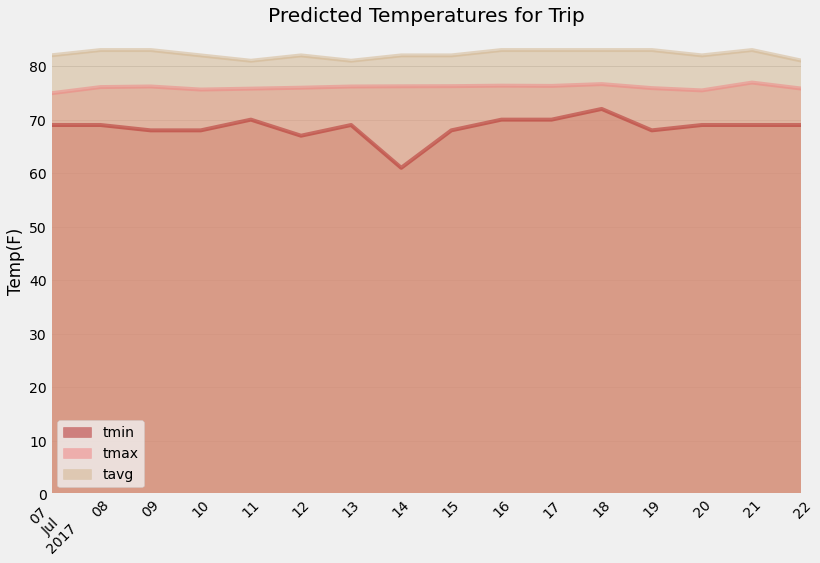

<IPython.core.display.Javascript object>

In [38]:
# Plot the daily normals as an area plot with `stacked=False`
colors = ["firebrick", "lightcoral", "tan"]
trip_normals_df.plot(
    kind="area",
    figsize=(12, 8),
    stacked=False,
    color=colors,
    alpha=0.5,
    title="Predicted Temperatures for Trip",
    rot=45,
)
plt.xlabel("")
plt.ylabel("Temp(F)")
plt.savefig("output_images/Predicted Temperatures for Trip.png")
plt.show()